N'oubliez pas de nommez votre fichier correctement !!!!!!!

Explorez la librairie scikit-learn : https://scikit-learn.org/stable/modules/tree.html

# PARTIE 1 : Environnement

### Exercice 1 : Préparation de l’environnement

In [1]:
!pip install graphviz

In [2]:
!pip install pydotplus

In [3]:
from sklearn.datasets import load_iris
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# PARTIE 2 : Executez et interprétez les résultats

### Exercice 2 : Executez et interprétez les résultats

#### *2*. Construire et visualiser un arbre de décision

On récupère le jeu de données des iris pour comprendre les arbres de décisions, il s'agit d'un jeu de données célèbre qui comporte la longueur et la largeur des sépales et des pétales en cm, de 150 fleurs d'iris de trois espèces différentes qui sont : Setosa, Versicolor et Virginica.

L'objevctif de ce TP est simple : développer un programme capable de
reconnaitre une espèce parmi plusieurs de la famille des Iris. L’algorithme utilisera alors les 4 features pour effectuer son calcul :

    • 𝒙𝟏 : La longueur du pétale
    • 𝒙𝟐 : La largeur du pétale
    • 𝒙𝟑 : La longueur du sépale
    • 𝒙𝟒 : La largeur du sépale

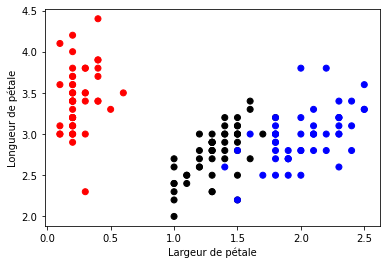

In [4]:
iris = load_iris()
X = iris.data # Les features
y = iris.target # Les targets
colormap=np.array(['Red','black','blue'])
plt.scatter(X[:,3], X[:,1], c = colormap[y])
plt.xlabel("Largeur de pétale")
plt.ylabel("Longueur de pétale")
plt.show()

## 2.1. L'algorithme Decision Tree

> On commence d'abord par appliquer une politique 70-30 pour générer les données d'apprentissages (ou d'entrainement) et, les donnes de tests (ou de décision) avec la fonction **train_test_split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

> Utilisez la fonction **DecisionTreeClassifier** pour construire un arbre de décision sur cette base. Vous utiliserez les paramètres par défaut de l’algorithme.

In [6]:
# création du modèle
modelTree = tree.DecisionTreeClassifier()

In [7]:
# entraînement du modèle
modelTree.fit(X_train,y_train)

DecisionTreeClassifier()

###  récupération des entêtes

In [8]:
classes = iris.target_names
features = iris.feature_names

In [9]:
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### visualisation

> Pour visualiser le résultat de cet apprentissage, vous pouvez exporter la structure de
l’arbre obtenu au format DOT de Graphviz:

- Utilisez la fonction export_graphviz pour exporter la structure de l’arbre dans
un fichier .dot.
- Chargez le contenu du fichier obtenu dans un visualiseur en ligne.
- Si vous avez installé les packages python pour Graphviz, vous pouvez visualiser
et/ou exporter directement le graphe dans le script python

## Executez cette cellule pour visualiser le graphe.

In [11]:
# exportation de la structure de l'arbre dans un fichier .dot
dotFile = open("C:/Users/matth/TP1/file1.dot", "w")

# Viusaliseur en ligne
tree.export_graphviz(modelTree, out_file=dotFile,
                    feature_names=features,
                    class_names=classes,
                    filled=True, rounded=True,
                    special_characters=True)
dotFile.close()

# Visualisation
dot_data = tree.export_graphviz(modelTree, out_file=None,
                        feature_names=features,
                        class_names=classes,
                        filled=True, rounded=True,
                        special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [12]:
# testez le modèle

y_pred = modelTree.predict(X_test)

In [13]:
# afficher l'accuracy :
# importez la fonction accuracy_score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Tree -> ", accuracy)

Tree ->  1.0


##### Vos commentaire ici :

j'ai un problème avec l'installation graphviz. Je n'arrive pas l'ajouter à mes variables d'environnements donc je ne pas exécuter le code si dessus. J'ai quand même pu calculer l'accuracy



****

# PARTIE 3 : Même exercice, avec validation-croisée

## 3.1) Comparaison des résultats avec la validation croisée

Pour obtenir un indicateur de performance plus fiable, vous allez recommencer en utilisant une validation croisée:

- Lancez une procédure de validation croisée à 5 folds pour calculer un taux de bonne classification moyen et un écart-type correspondant. Scikit-learn propose des fonctions pour faire cela

- Pour chaque classifieur, affichez le résultat sous la forme:
    Accuracy: mean (+/- std)
    où mean et std sont à remplacer par les valeurs obtenues

In [14]:
def cvComparaison(Model, X, y, kfolds):
    scoreCV = cross_val_score(Model,X,y,cv=kfolds)
    mean = np.mean(scoreCV)
    std = np.std(scoreCV)
    return mean, std

In [15]:
def printResult(model, m,s):
    print(model+" Accuracy: "+str(m)+" (+/- "+str(s)+")")

In [16]:
# Decision tree with CV

TreeMean, TreeStd = cvComparaison(tree.DecisionTreeClassifier(), X, y, 5)

In [17]:
printResult("Tree -> ",TreeMean,TreeStd)

Tree ->  Accuracy: 0.9600000000000002 (+/- 0.03265986323710903)


#### Vos commntaires ici :

- Qu'est-ce que vous observez ?

Si la précision directe sur l'ensemble de test est similaire à la précision moyenne obtenue par la validation croisée, cela indique que notre modèle est relativement stable et généralise bien sur différentes divisions des données. Une grande différence entre ces mesures pourrait indiquer que le modèle est plus sensible à la manière dont les données sont divisées.

Un faible écart-type dans les résultats de la validation croisée suggère que le modèle a des performances stables, peu importe la division des données. Si cet écart-type est élevé, même avec une précision moyenne similaire à la précision directe, cela peut indiquer que certaines divisions des données sont beaucoup plus favorables au modèle que d'autres.

- Comparer les 2 performances

Il est important de considérer à la fois la précision directe et les résultats de la validation croisée pour obtenir une vue complète de la performance du modèle. La validation croisée offre un aperçu plus fiable de la capacité du modèle à généraliser, tandis que la précision directe sur l'ensemble de test montre comment le modèle performe sur un ensemble spécifique de données. En comparant ces deux approches, vous pouvez mieux évaluer la robustesse et la fiabilité de votre modèle d'arbre de décision sur le dataset Iris.



****

# PARTIE 4 : Ici vou allez écrire le code équivalent pour afficher le resultat attendu

## Exercice 4 : Visualiser les frontières de décision

Sur un problème de classification en deux dimensions, on peut facilement visualiser les
frontières de décision d’un arbre de décision et analyser comment elles évoluent en
fonction de certains paramètres d’apprentissage.

- Générer une base de données synthétique en deux dimensions avec la fonction make_moon de Scikit-learn11. Cette base sera composée de 2 classes, 500 instances, et un taux de bruit de 0.2.

Explorez make_moons : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [18]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

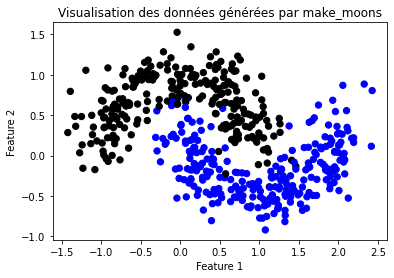

In [19]:
dataX, dataY = make_moons(500, noise = 0.2)
colormap=np.array(['Black','Blue'])
# complétez ici
plt.scatter(dataX[:, 0], dataX[:, 1], c=colormap[dataY], s=40)
plt.title("Visualisation des données générées par make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

- Lancez l’apprentissage d’un arbre de décision, sur cette base, comme à l’exercice précédent.

In [20]:
modelArbre = tree.DecisionTreeClassifier()

In [21]:
X_app, X_dec, y_app, y_dec = train_test_split(dataX, dataY, test_size=0.30, random_state=42)

In [22]:
# Entrainez l'arbre de décision ici
model = DecisionTreeClassifier(random_state=42)
model.fit(dataX, dataY)

DecisionTreeClassifier(random_state=42)

- Créez une fonction python plot_decision_frontiers qui prend en paramètre un classifieur, sa base d’apprentissage et une figure dans laquelle seront dessinés les points (2D) de la base d’apprentissage et les frontières de décision du classifieur.

Cette fonction procédera en plusieurs étapes:

1. Générer une grille de points 2D: {(i, j)} pour i = $x^{(1)}_{min}...x^{(1)}_{max} et j = x^{(2)}_{min}...x^{(2)}_{max}$ Pour cela, utilisez la fonction **meshgrid** de NumPy.

2. Rassembler les prédictions de l’arbre pour chacun des points de cette grille. Les fonctions **ravel**, **c_** et reshape de NumPy pourront vous être utiles.

3. Afficher les points de la base d’apprentissage avec la fonction **scatter** de Matplotlib.

4. Afficher les frontières de décisions en utilisant la fonction **contourf** de Matplotlib.

In [23]:
def plot_decision_frontiers(Model, X, y, check, fig):

    if(check==False):
        txt="tree1-Gini"
    elif(check==True):
        txt="tree2-Entropy"
    else:
        txt=check

    # Meshgrid

    h = .2
    colors = "bry"

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    fig.set_title(txt)
    fig.axis('tight')

    for i, color in zip(Model.classes_, colors):
        idx = np.where(y == i)
        fig.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.Paired, edgecolor='black', s=20)

- Créez une figure contenant 3 sous-figures avec la fonction subplots de Matplotlib.
- Appelez la fonction plot_decision_frontiers pour chacun des trois classifieurs et chacune des 3 sous-figures.

Dans la cellule ci-dessous, afficher votre arbre de décision, cela ressmeblera à quyelque chos comme ça :::

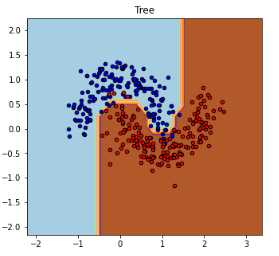

Ne vous inquietez pas, votre résultat peut être différent selon que la générartion des données se fait aléatoirement.

In [24]:
# complétez le code ici avec X_app et y_app
from sklearn.datasets import make_moons
X_app, y_app = make_moons(n_samples=500, noise=0.2, random_state=42)

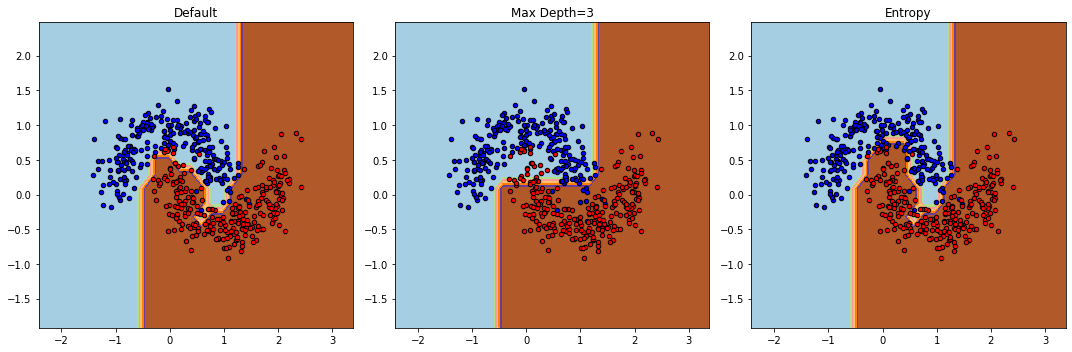

In [25]:
from sklearn.model_selection import train_test_split

# Prepare the classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the models (assuming dataX and dataY are already defined)
clf1.fit(dataX, dataY)
clf2.fit(dataX, dataY)
clf3.fit(dataX, dataY)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot decision frontiers
plot_decision_frontiers(clf1, dataX, dataY, "Default", axs[0])
plot_decision_frontiers(clf2, dataX, dataY, "Max Depth=3", axs[1])
plot_decision_frontiers(clf3, dataX, dataY, "Entropy", axs[2])

plt.tight_layout()
plt.show()

#### Vos commentaire ici :

- Comparez les duex visuels :::

Configuration par Défaut : Avec les paramètres par défaut, l'arbre de décision pourrait avoir tendance à créer des frontières de décision très complexes, qui pourraient potentiellement surajuster les données. Cela est dû à la nature même des arbres de décision qui, sans restriction, vont croître jusqu'à ce qu'ils classent parfaitement les données d'entraînement, menant à des modèles très spécifiques aux données sur lesquelles ils ont été entraînés.

Profondeur Maximale Limitée (Max Depth=3) : En limitant la profondeur de l'arbre, vous imposez une forme de régularisation. Cela empêche l'arbre de devenir trop complexe et de surajuster les données. Les frontières de décision seront plus simples et potentiellement plus généralisables à de nouvelles données. Cependant, cette simplification pourrait aussi conduire à une moins bonne performance sur l'ensemble d'entraînement si la limitation est trop stricte.

Utilisation de l'Entropie comme Critère (Entropy) : Changer le critère de Gini à Entropy pourrait légèrement modifier la façon dont l'arbre de décision effectue ses divisions, mais l'effet global sur la complexité des frontières de décision dépendra fortement des données. Dans certains cas, l'entropie peut conduire à des arbres plus équilibrés, mais l'effet n'est pas universel et dépend des caractéristiques spécifiques du dataset.

- que constatez-vous ?

Ces observations soulignent l'importance de l'ajustement des hyperparamètres et de la sélection du modèle dans la construction de classifieurs précis et généralisables. Elles montrent également comment la visualisation des frontières de décision peut être un outil précieux pour comprendre le comportement des modèles de classification et pour guider le processus de sélection et d'ajustement du modèle.



****

# PARTIE 5 : Les apramètres d'un décision tree

## Exercice 5 : Étude de paramètres

Toujours avec les mêmes données générées grace à make_moons...réalisez l'expérience suivante.

- Lancez l’apprentissage de deux arbres de décision sur cette base: l’un avec le critère de partitionnement Gini, l’autre avec Entropy.

In [26]:
modelTree1 = tree.DecisionTreeClassifier(criterion="gini")
modelTree2 = tree.DecisionTreeClassifier(criterion="entropy")

In [27]:
dataX2, dataY2 = dataX, dataY
X_app_1, X_dec_2, y_app_1, y_dec_2 = train_test_split(dataX2, dataY2, test_size=0.30, random_state=42)

modelTree1 = modelTree1.fit(X_app_1,y_app_1)

modelTree2 = modelTree2.fit(X_app_1,y_app_1)

- Visualisez les frontières de décision des deux classifieurs ainsi obtenus en utilisant la fonction définie à l’exercice précédent.

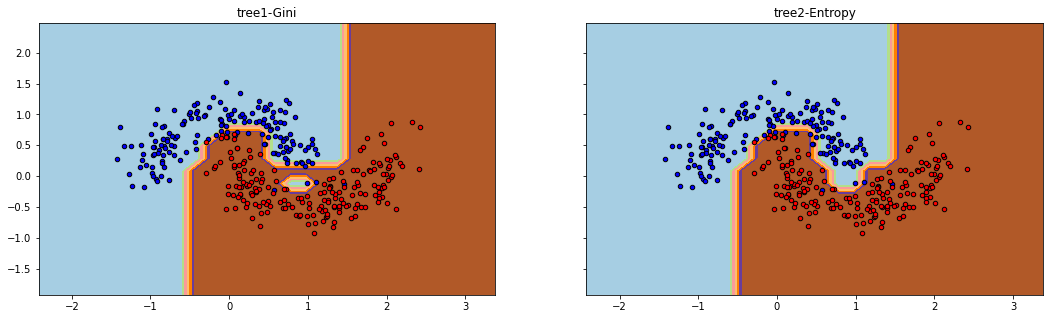

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=True)

plot_decision_frontiers(modelTree1, X_app_1,y_app_1, False, ax[0])
plot_decision_frontiers(modelTree2, X_app_1,y_app_1, True, ax[1])

#### Vos commentaires par rapport à l'apprentissage d'un arbre de décision :


Interprétabilité : Les arbres de décision sont parmi les modèles les plus faciles à interpréter et à visualiser, ce qui les rend particulièrement utiles pour les applications où comprendre le processus de prise de décision est crucial.

Polyvalence : Ils peuvent être utilisés pour des tâches de classification et de régression, et sont capables de gérer des données numériques et catégorielles.

Prétraitement Minimal : Contrairement à de nombreux autres algorithmes, les arbres de décision nécessitent peu de prétraitement des données. Ils ne nécessitent pas de normalisation des données et peuvent gérer des caractéristiques à différentes échelles.

Gestion des Données Non Linéaires : Ils sont capables de capturer des relations non linéaires entre les caractéristiques sans avoir besoin de transformer les données.

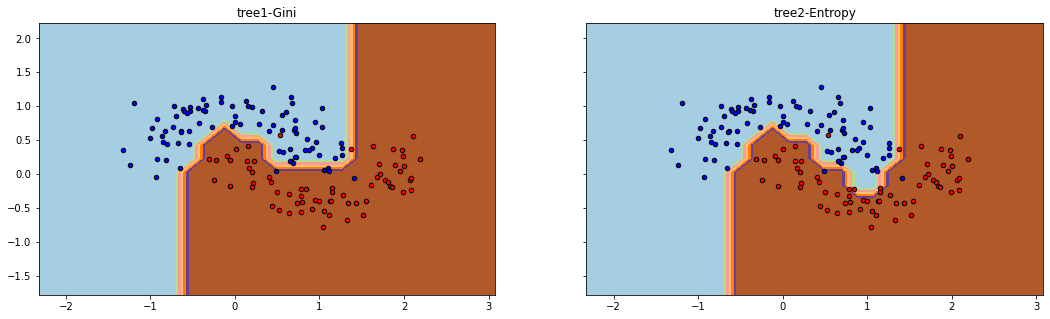

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=True)

plot_decision_frontiers(modelTree1, X_dec_2,y_dec_2, False, ax[0])
plot_decision_frontiers(modelTree2, X_dec_2,y_dec_2, True, ax[1])

#### Vos commentaires par rapport à la prédiction avec un arbre de décision :

Rapidité : Une fois l'arbre construit, les prédictions sont rapides car elles nécessitent un nombre relativement petit d'opérations de comparaison pour atteindre une feuille.

Facilité d'Interprétation : Les décisions prises par l'arbre sont faciles à suivre et à expliquer, ce qui peut être particulièrement utile dans des domaines où il est important de comprendre le raisonnement derrière une prédiction.

Gestion des Relations Non Linéaires : Les arbres de décision peuvent capturer des relations complexes et non linéaires sans avoir besoin de transformer les caractéristiques.

Flexibilité : Ils peuvent traiter à la fois des tâches de classification et de régression, ainsi que des données mixtes (numériques et catégorielles).



****

#### Ma conclusion, en principe, vous devrez arriver à la conclusion selon laquelle :

Gini est performant pour les arbres avec des feuilles aux nombreuses informations, alors que l'Entropie est préférable lorsqu'il y 'en a moins.

**Vous pouvez vérifier (vous le confirmer) cela, en calculant la performance de modelTree1 et modelTree2.**

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# Prédiction sur l'ensemble de test
y_pred1 = modelTree1.predict(X_dec_2)

# Calcul des métriques
accuracy1 = accuracy_score(y_dec_2, y_pred1)
precision1 = precision_score(y_dec_2, y_pred1, average='binary')
recall1 = recall_score(y_dec_2, y_pred1, average='binary')
f1_1 = f1_score(y_dec_2, y_pred1, average='binary')

print(f"Performance de modelTree1 (Gini):")
print(f"Précision: {accuracy1:.2f}, Précision: {precision1:.2f}, Rappel: {recall1:.2f}, Score F1: {f1_1:.2f}")

Performance de modelTree1 (Gini):
Précision: 0.92, Précision: 0.88, Rappel: 0.94, Score F1: 0.91


In [32]:
# Prédiction sur l'ensemble de test
y_pred2 = modelTree2.predict(X_dec_2)

# Calcul des métriques
accuracy2 = accuracy_score(y_dec_2, y_pred2)
precision2 = precision_score(y_dec_2, y_pred2, average='binary')
recall2 = recall_score(y_dec_2, y_pred2, average='binary')
f1_2 = f1_score(y_dec_2, y_pred2, average='binary')

print(f"Performance de modelTree2 (Entropie):")
print(f"Précision: {accuracy2:.2f}, Précision: {precision2:.2f}, Rappel: {recall2:.2f}, Score F1: {f1_2:.2f}")

Performance de modelTree2 (Entropie):
Précision: 0.93, Précision: 0.91, Rappel: 0.92, Score F1: 0.92


modelTree1 est légèrement plus performant